In [ ]:
  !nvidia-smi

Mon Nov 22 01:50:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download, ZIP Dataset and remove file not needed

In [ ]:
import os

# setting akun kaggle
os.environ['KAGGLE_USERNAME'] = 'daynos'
os.environ['KAGGLE_KEY'] = '25455a734110ce4a3df29787d5c1b365'

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 736M/745M [00:06<00:00, 122MB/s]
100% 745M/745M [00:06<00:00, 119MB/s]


In [ ]:
!unzip /content/covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset')

['Viral Pneumonia',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Normal',
 'Viral Pneumonia.metadata.xlsx',
 'COVID',
 'Lung_Opacity.metadata.xlsx',
 'COVID.metadata.xlsx',
 'Lung_Opacity']

In [ ]:
# hapus file tidak terpakai
!rm -rf /content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx
!rm -rf /content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx
!rm -rf /content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx
!rm -rf "/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx"
!rm -rf /content/COVID-19_Radiography_Dataset/README.md.txt

In [ ]:
# hapus class Lung_Opacity karena hanya ingin menggunakan 3 class saja.
!rm -rf /content/COVID-19_Radiography_Dataset/Lung_Opacity

In [ ]:
os.listdir('/content/COVID-19_Radiography_Dataset/')

['Viral Pneumonia', 'Normal', 'COVID']

# Fungsi Negative Transformation

In [ ]:
def get_negativeT(img):
  # Read pixels and apply negative transformation
  for i in range(0, img.size[0]-1):
      for j in range(0, img.size[1]-1):
          # Get pixel value at (x,y) position of the image
          pixelColorVals = img.getpixel((i,j));
          if type(pixelColorVals) is tuple:
            pixelColorVals = pixelColorVals[0]
          # Invert color
          pixel    = 255 - pixelColorVals; # Negate pixel
          # Modify the image with the inverted pixel values
          img.putpixel((i,j),(pixel));
  return img

# Create new directory for image after & before negative tranformation

In [ ]:
!mkdir '/content/Dataset_Without_preprocessing'
!mkdir '/content/Dataset_Without_preprocessing/COVID'
!mkdir '/content/Dataset_Without_preprocessing/Normal'
!mkdir '/content/Dataset_Without_preprocessing/Viral Pneumonia'

In [ ]:
!mkdir '/content/Dataset_With_preprocessing'
!mkdir '/content/Dataset_With_preprocessing/COVID'
!mkdir '/content/Dataset_With_preprocessing/Normal'
!mkdir '/content/Dataset_With_preprocessing/Viral Pneumonia'

# Move 10% Dataset after & before preprocessing

## move 10% each label image without preprocessing

In [ ]:
# COVID
dir_i = os.listdir('/content/COVID-19_Radiography_Dataset/COVID')
x = 0
for i in dir_i:
  if x > 362:
    break
  str = os.path.join('/content/COVID-19_Radiography_Dataset/COVID', i)
  !mv "{str}" "/content/Dataset_Without_preprocessing/COVID"
  x += 1
print(len(os.listdir('/content/Dataset_Without_preprocessing/COVID')))

363


In [ ]:
# Normal
dir_i = os.listdir('/content/COVID-19_Radiography_Dataset/Normal')
x = 0
for i in dir_i:
  if x > 1021:
    break
  str = os.path.join('/content/COVID-19_Radiography_Dataset/Normal', i)
  !mv "{str}" "/content/Dataset_Without_preprocessing/Normal"
  x += 1
print(len(os.listdir('/content/Dataset_Without_preprocessing/Normal')))

1022


In [ ]:
# Viral Pneumonia
dir_i = os.listdir('/content/COVID-19_Radiography_Dataset/Viral Pneumonia')
x = 0
for i in dir_i:
  if x > 135:
    break
  str = os.path.join('/content/COVID-19_Radiography_Dataset/Viral Pneumonia', i)
  !mv "{str}" "/content/Dataset_Without_preprocessing/Viral Pneumonia"
  x += 1
print(len(os.listdir('/content/Dataset_Without_preprocessing/Viral Pneumonia')))

136


## move 10% each label image with preprocessing

In [ ]:
from PIL import Image

In [ ]:
dir_img = '/content/Dataset_Without_preprocessing/COVID'
x = 0

for i in os.listdir(dir_img):
  img = os.path.join(dir_img, i)
  img1 = Image.open(img)
  img2 = get_negativeT(img1)
  dir_pre = f"/content/Dataset_With_preprocessing/COVID/COVID-{x}"
  img2.save(dir_pre + ".png")
  x += 1
print(os.listdir('/content/Dataset_With_preprocessing/COVID'))

['COVID-361.png', 'COVID-344.png', 'COVID-14.png', 'COVID-219.png', 'COVID-241.png', 'COVID-284.png', 'COVID-95.png', 'COVID-63.png', 'COVID-232.png', 'COVID-269.png', 'COVID-246.png', 'COVID-87.png', 'COVID-326.png', 'COVID-213.png', 'COVID-273.png', 'COVID-146.png', 'COVID-266.png', 'COVID-1.png', 'COVID-106.png', 'COVID-239.png', 'COVID-32.png', 'COVID-315.png', 'COVID-48.png', 'COVID-109.png', 'COVID-140.png', 'COVID-348.png', 'COVID-94.png', 'COVID-2.png', 'COVID-152.png', 'COVID-91.png', 'COVID-329.png', 'COVID-7.png', 'COVID-157.png', 'COVID-12.png', 'COVID-290.png', 'COVID-301.png', 'COVID-136.png', 'COVID-247.png', 'COVID-199.png', 'COVID-280.png', 'COVID-185.png', 'COVID-272.png', 'COVID-170.png', 'COVID-193.png', 'COVID-274.png', 'COVID-75.png', 'COVID-36.png', 'COVID-35.png', 'COVID-6.png', 'COVID-113.png', 'COVID-195.png', 'COVID-89.png', 'COVID-190.png', 'COVID-138.png', 'COVID-135.png', 'COVID-334.png', 'COVID-288.png', 'COVID-44.png', 'COVID-62.png', 'COVID-155.png', 'C

In [ ]:
print(len(os.listdir('/content/Dataset_With_preprocessing/COVID')))

363


In [ ]:
dir_img = '/content/Dataset_Without_preprocessing/Normal'
x = 0

for i in os.listdir(dir_img):
  img = os.path.join(dir_img, i)
  img1 = Image.open(img)
  img2 = get_negativeT(img1)
  dir_pre = f"/content/Dataset_With_preprocessing/Normal/Normal-{x}"
  img2.save(dir_pre + ".png")
  x += 1
print(len(os.listdir('/content/Dataset_With_preprocessing/Normal')))

1022


In [ ]:
dir_img = '/content/Dataset_Without_preprocessing/Viral Pneumonia'
x = 0

for i in os.listdir(dir_img):
  img = os.path.join(dir_img, i)
  img1 = Image.open(img)
  img2 = get_negativeT(img1)
  dir_pre = f"/content/Dataset_With_preprocessing/Viral Pneumonia/Viral Pneumonia-{x}"
  img2.save(dir_pre + ".png")
  x += 1
print(len(os.listdir('/content/Dataset_With_preprocessing/Viral Pneumonia')))

136


In [ ]:
# !rm -rf '/content/Dataset_With_preprocessing/Viral Pneumonia/.ipynb_checkpoints'
# print(len(os.listdir('/content/Dataset_With_preprocessing/Viral Pneumonia')))

0


# Divide dataset into train and val

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

folder = '/content/Dataset_Without_preprocessing'

splitfolders.ratio(folder, output='/content/Dataset_WP_split',
                 seed=42, ratio=(0.8, 0.2),
                 group_prefix = None
                 )

Copying files: 1521 files [00:00, 3898.67 files/s]


In [ ]:
import splitfolders

folder = '/content/Dataset_With_preprocessing'

splitfolders.ratio(folder, output='/content/Dataset_WithP_split',
                 seed=42, ratio=(0.8, 0.2),
                 group_prefix = None
                 )

Copying files: 1521 files [00:00, 3871.75 files/s]


# Model CNN + Plot + Confussion matrix with preprocessing

In [ ]:
train_dir = '/content/Dataset_WithP_split/train'
val_dir = '/content/Dataset_WithP_split/val'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    color_mode='grayscale',
    ) # set as training data
validation_generator = val_datagen.flow_from_directory(
    val_dir, # same directory as training data
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    )

Found 1215 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 26, 26, 64)      

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch= 1215 // 8,
                    validation_data=validation_generator,
                    validation_steps= 306 // 8,
                    epochs=100,
                    callbacks=[callbacks],
                    verbose=1
                  )

Epoch 1/100
151/151 [==============================] - 12s 74ms/step - loss: 0.8223 - accuracy: 0.6620 - val_loss: 0.7355 - val_accuracy: 0.6809
Epoch 2/100
151/151 [==============================] - 11s 71ms/step - loss: 0.7103 - accuracy: 0.6761 - val_loss: 0.6581 - val_accuracy: 0.6908
Epoch 3/100
151/151 [==============================] - 11s 71ms/step - loss: 0.6689 - accuracy: 0.6819 - val_loss: 0.6124 - val_accuracy: 0.6974
Epoch 4/100
151/151 [==============================] - 11s 71ms/step - loss: 0.6248 - accuracy: 0.6984 - val_loss: 0.5483 - val_accuracy: 0.7237
Epoch 5/100
151/151 [==============================] - 10s 69ms/step - loss: 0.6151 - accuracy: 0.7133 - val_loss: 0.5240 - val_accuracy: 0.7796
Epoch 6/100
151/151 [==============================] - 10s 67ms/step - loss: 0.5720 - accuracy: 0.7382 - val_loss: 0.5005 - val_accuracy: 0.7829
Epoch 7/100
151/151 [==============================] - 10s 68ms/step - loss: 0.5666 - accuracy: 0.7465 - val_loss: 0.5273 - val_ac

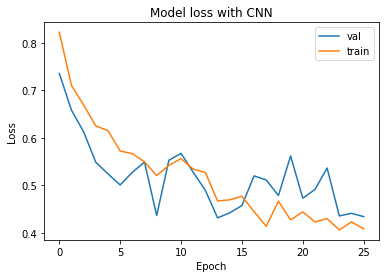

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model loss with CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['val', 'train'], loc='upper right')
plt.show()

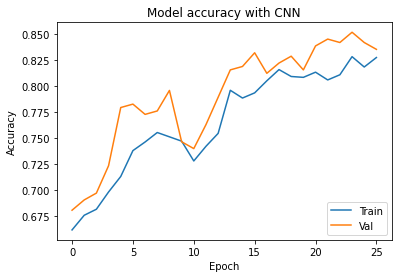

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

validation_generator.reset()
Y_pred = model.predict_generator(validation_generator, 306 // 8+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cf_mtx = confusion_matrix(validation_generator.classes, y_pred)
print(cf_mtx)
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix
[[ 29  40   4]
 [  3 198   4]
 [  0   6  22]]
Classification Report
                 precision    recall  f1-score   support

          COVID       0.91      0.40      0.55        73
         Normal       0.81      0.97      0.88       205
Viral Pneumonia       0.73      0.79      0.76        28

       accuracy                           0.81       306
      macro avg       0.82      0.72      0.73       306
   weighted avg       0.83      0.81      0.79       306



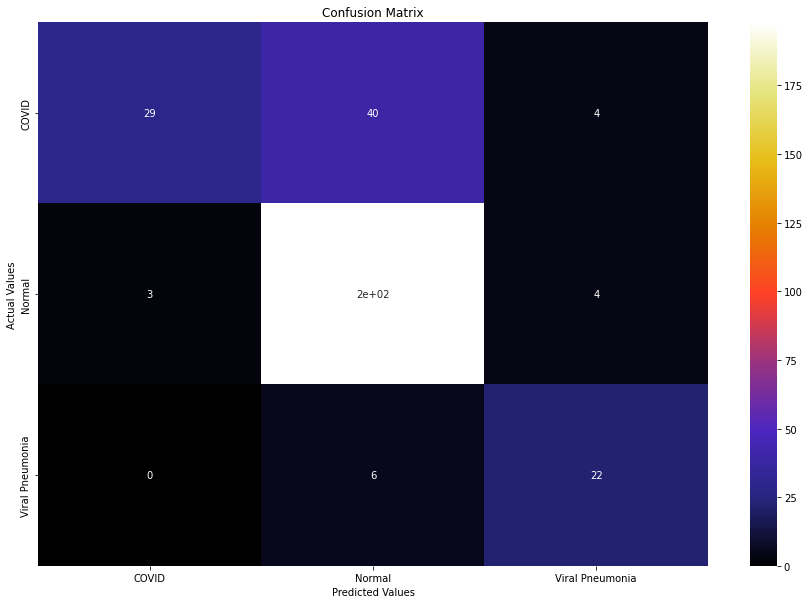

In [ ]:
import pandas as pd
import seaborn as sns

cm_df = pd.DataFrame(cf_mtx,
                     index=target_names,
                     columns=target_names)

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, cmap='CMRmap')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Model CNN + Plot + Confussion matrix without preprocessing

In [ ]:
train_dir_WP = '/content/Dataset_WP_split/train'
val_dir_WP = '/content/Dataset_WP_split/val'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir_WP,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    color_mode='grayscale',
    ) # set as training data
validation_generator = val_datagen.flow_from_directory(
    val_dir_WP, # same directory as training data
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    )

Found 1215 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,1)),
    # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 26, 26, 64)      

In [ ]:
model_1.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

In [ ]:
history = model_1.fit(train_generator,
                    steps_per_epoch= 1215 // 8,
                    validation_data=validation_generator,
                    validation_steps= 306 // 8,
                    epochs=100,
                    callbacks=[callbacks],
                    verbose=1
                  )

Epoch 1/100
151/151 [==============================] - 12s 72ms/step - loss: 0.9131 - accuracy: 0.6382 - val_loss: 0.8603 - val_accuracy: 0.6743
Epoch 2/100
151/151 [==============================] - 11s 72ms/step - loss: 0.8589 - accuracy: 0.6686 - val_loss: 0.8240 - val_accuracy: 0.6743
Epoch 3/100
151/151 [==============================] - 11s 70ms/step - loss: 0.8097 - accuracy: 0.6694 - val_loss: 0.7520 - val_accuracy: 0.6743
Epoch 4/100
151/151 [==============================] - 11s 70ms/step - loss: 0.7600 - accuracy: 0.6669 - val_loss: 0.7983 - val_accuracy: 0.6743
Epoch 5/100
151/151 [==============================] - 11s 70ms/step - loss: 0.7336 - accuracy: 0.6694 - val_loss: 0.6591 - val_accuracy: 0.6743
Epoch 6/100
151/151 [==============================] - 11s 69ms/step - loss: 0.6896 - accuracy: 0.6752 - val_loss: 0.6355 - val_accuracy: 0.7105
Epoch 7/100
151/151 [==============================] - 11s 70ms/step - loss: 0.6646 - accuracy: 0.6827 - val_loss: 0.6828 - val_ac

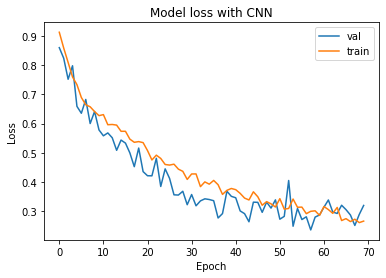

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model loss with CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['val', 'train'], loc='upper right')
plt.show()

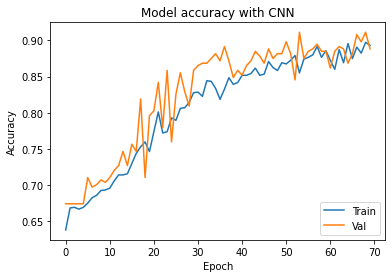

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

validation_generator.reset()
Y_pred = model_1.predict_generator(validation_generator, 306 // 8+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cf_mtx = confusion_matrix(validation_generator.classes, y_pred)
print(cf_mtx)
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix
[[ 54  19   0]
 [  7 197   1]
 [  2   3  23]]
Classification Report
                 precision    recall  f1-score   support

          COVID       0.86      0.74      0.79        73
         Normal       0.90      0.96      0.93       205
Viral Pneumonia       0.96      0.82      0.88        28

       accuracy                           0.90       306
      macro avg       0.91      0.84      0.87       306
   weighted avg       0.89      0.90      0.89       306



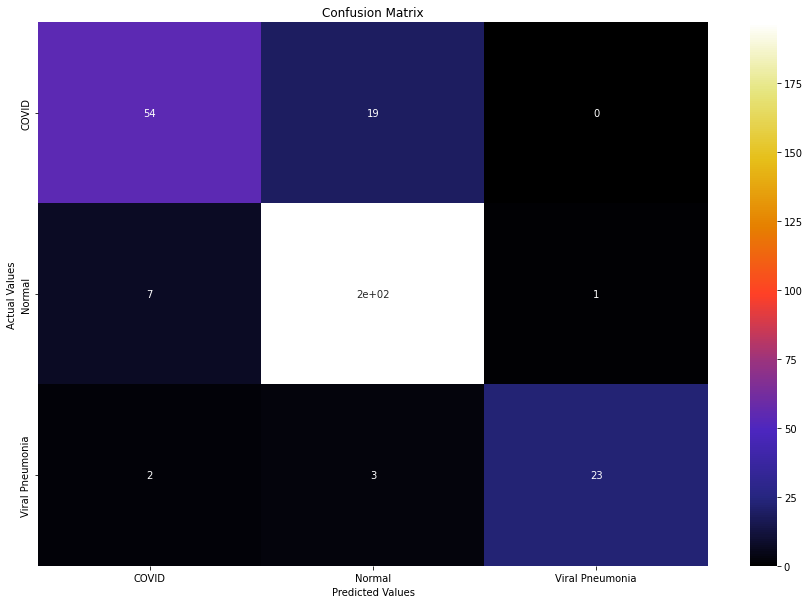

In [ ]:
import pandas as pd
import seaborn as sns

cm_df = pd.DataFrame(cf_mtx,
                     index=target_names,
                     columns=target_names)

plt.figure(figsize=(15,10))
sns.heatmap(cm_df, annot=True, cmap='CMRmap')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Model SVM + Confussion matrix with preprocessing

In [ ]:
import pandas as pd
from sklearn import svm
# from sklearn.model_selection import GridSearchCV
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [ ]:
Categories=['COVID', 'Normal', 'Viral Pneumonia']

flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir= '/content/Dataset_With_preprocessing'
print(os.listdir(datadir))
for i in Categories:
  print(f'loading... category : {i}')
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,1))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_1=pd.DataFrame(flat_data)
df_1['Target']=target
df_1

['Viral Pneumonia', 'Normal', 'COVID']
loading... category : COVID
loaded category:COVID successfully
loading... category : Normal
loaded category:Normal successfully
loading... category : Viral Pneumonia
loaded category:Viral Pneumonia successfully


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50137,50138,50139,50140,50141,50142,50143,50144,50145,50146,50147,50148,50149,50150,50151,50152,50153,50154,50155,50156,50157,50158,50159,50160,50161,50162,50163,50164,50165,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175,Target
0,0.900648,0.900977,0.901304,0.901978,0.905226,0.908526,0.909839,0.913069,0.913069,0.917109,0.919331,0.924247,0.924177,0.924519,0.924834,0.926944,0.923439,0.911516,0.892732,0.879604,0.874370,0.872400,0.867516,0.865993,0.865993,0.865993,0.863143,0.863384,0.863384,0.866248,0.867342,0.869555,0.872136,0.873179,0.873179,0.873179,0.869258,0.867078,0.864751,0.865748,...,0.562880,0.560557,0.560557,0.561213,0.560043,0.556561,0.550701,0.557215,0.561146,0.560236,0.550786,0.526281,0.511961,0.491542,0.464916,0.436451,0.408638,0.385152,0.367699,0.298896,0.224073,0.197752,0.205153,0.208635,0.215287,0.219459,0.224298,0.224781,0.225727,0.231545,0.235617,0.239420,0.238400,0.237202,0.237763,0.243888,0.241534,0.235869,0.129064,0
1,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.958850,0.960148,0.937858,0.831440,0.780097,...,0.545082,0.545959,0.545812,0.541820,0.542697,0.542043,0.532548,0.519529,0.516834,0.513549,0.509725,0.501885,0.497386,0.490091,0.494279,0.511349,0.520623,0.515927,0.518444,0.499441,0.479506,0.469500,0.456626,0.440946,0.427142,0.410294,0.397669,0.393999,0.390207,0.375174,0.363851,0.352130,0.338202,0.321113,0.306451,0.289585,0.269255,0.246738,0.085944,0
2,0.693461,0.693461,0.693461,0.693461,0.693461,0.693461,0.694809,0.698039,0.694722,0.690905,0.696140,0.706369,0.716474,0.725245,0.725212,0.720986,0.711925,0.698962,0.695176,0.693076,0.688193,0.687708,0.685618,0.685618,0.681556,0.674919,0.668479,0.665414,0.674486,0.680639,0.681004,0.674860,0.667865,0.658347,0.657484,0.672274,0.690809,0.704698,0.713135,0.719239,...,0.523839,0.520066,0.518762,0.514614,0.512597,0.517760,0.521073,0.521910,0.517249,0.516602,0.518890,0.519410,0.516193,0.508975,0.503396,0.499421,0.500298,0.500122,0.505919,0.509197,0.505715,0.499258,0.492294,0.487443,0.483784,0.489496,0.489262,0.486682,0.495536,0.495651,0.493615,0.487981,0.477993,0.469858,0.437517,0.412229,0.400745,0.397908,0.361728,0
3,0.996078,0.998048,0.999450,0.999343,0.999343,0.996596,0.995503,0.992813,0.992813,0.996078,0.997762,0.999343,0.999343,0.999343,0.999343,0.996078,0.996078,0.996078,0.996078,0.998153,1.000000,0.996078,0.996078,0.996078,0.996742,0.999697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996525,0.996078,0.996078,0.996078,0.996078,...,0.714548,0.713390,0.709908,0.706129,0.700335,0.697368,0.690763,0.684619,0.676387,0.666954,0.661484,0.655771,0.651936,0.644669,0.641509,0.641509,0.640292,0.634720,0.627401,0.616955,0.605980,0.595315,0.585857,0.579237,0.586351,0.580366,0.569385,0.574981,0.591127,0.587960,0.574835,0.566917,0.539619,0.498879,0.471402,0.456447,0.463289,0.489837,0.524596,0
4,0.898670,0.985989,0.995971,0.995422,0.995422,0.995974,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.995933,0.995422,0.995422,0.994686,...,0.788120,0.784940,0.781396,0.772765,0.766383,0.761977,0.748497,0.736378,0.727886,0.715468,0.703293,0.688531,0.668152,0.648852,0.632175,0.620172,0.625613,0.600532,0.581121,0.567872,0.528732,0.499713,0.477456,0.457441,0.437165,0.423135,0.415691,0.408262,0.397327,0.393960,0.393960,0.393960,0.393960,0.393960,0.393960,0.393960,0.390270,0.399446,0.410958,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# split data

x_1 =df_1.iloc[:,:-1]
y_1 =df_1.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.2, random_state=42)

In [ ]:
model_1 = svm.SVC()
model_1.fit(X_train,y_train)

SVC()

## hasil train SVM with preprocessing

In [ ]:
y_pred_1 = model_1.predict(X_train)
accuracy_score(y_train, y_pred_1)

0.9029605263157895

## hasil test SVM with preprocessing

In [ ]:
y_pred_12 = model_1.predict(X_test)
accuracy_score(y_test, y_pred_12)

0.8524590163934426

In [ ]:
cm_mtx_svm = confusion_matrix(y_test, y_pred_12)
cm_mtx_svm

array([[ 32,  35,   0],
       [  6, 206,   1],
       [  0,   3,  22]])

In [ ]:
print(classification_report(y_test, y_pred_12))

              precision    recall  f1-score   support

           0       0.84      0.48      0.61        67
           1       0.84      0.97      0.90       213
           2       0.96      0.88      0.92        25

    accuracy                           0.85       305
   macro avg       0.88      0.77      0.81       305
weighted avg       0.85      0.85      0.84       305



In [ ]:
list_label = ['COVID', 'Normal', 'Viral Pneumonia']

array([0, 0, 0, ..., 2, 2, 2])

[[ 32  35   0]
 [  6 206   1]
 [  0   3  22]]


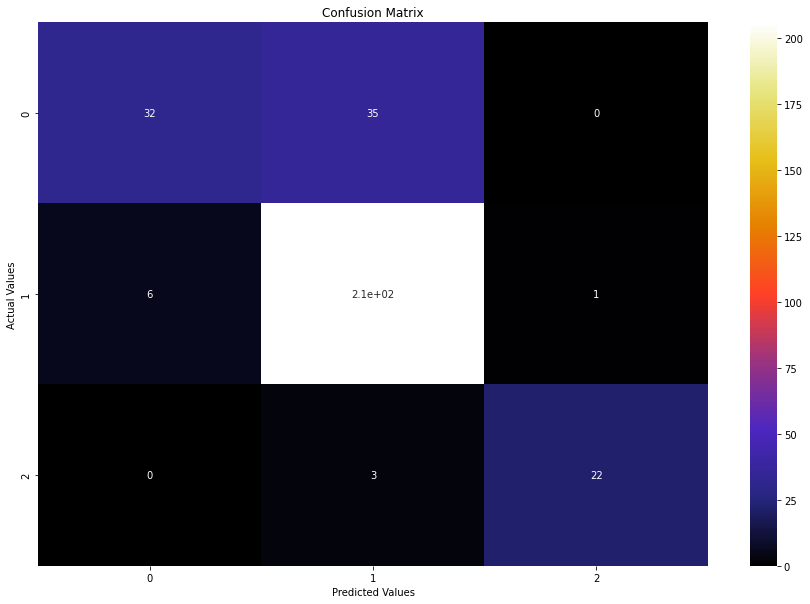

In [ ]:
cm_svm = pd.DataFrame(cm_mtx_svm)
                    #  index=list_label,
                    #  columns=list_label)
print(cm_mtx_svm)
plt.figure(figsize=(15,10))
sns.heatmap(cm_mtx_svm, annot=True, cmap='CMRmap')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Model SVM + Confussion matrix without preprocessing

In [ ]:
Categories=['COVID', 'Normal', 'Viral Pneumonia']

flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir_1= '/content/Dataset_Without_preprocessing'
print(os.listdir(datadir_1))
for i in Categories:
  print(f'loading... category : {i}')
  path = os.path.join(datadir_1,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(224,224,1))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df_2=pd.DataFrame(flat_data)
df_2['Target']=target
df_2

['Viral Pneumonia', 'Normal', 'COVID']
loading... category : COVID
loaded category:COVID successfully
loading... category : Normal
loaded category:Normal successfully
loading... category : Viral Pneumonia
loaded category:Viral Pneumonia successfully


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,50137,50138,50139,50140,50141,50142,50143,50144,50145,50146,50147,50148,50149,50150,50151,50152,50153,50154,50155,50156,50157,50158,50159,50160,50161,50162,50163,50164,50165,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175,Target
0,0.056974,0.134197,0.168873,0.200069,0.246498,0.300835,0.305103,0.279613,0.241524,0.268308,0.276966,0.257522,0.270871,0.315012,0.355265,0.364757,0.343399,0.356838,0.367998,0.385518,0.416284,0.422392,0.396420,0.375754,0.361179,0.358096,0.375143,0.396457,0.415944,0.412716,0.398431,0.396396,0.384452,0.345474,0.306988,0.256393,0.221059,0.196019,0.196303,0.219910,...,0.562292,0.562876,0.569498,0.579381,0.589563,0.598350,0.597938,0.595903,0.592454,0.591956,0.578198,0.561243,0.555562,0.538942,0.519314,0.502600,0.447864,0.391508,0.418059,0.478191,0.505774,0.559726,0.548427,0.473797,0.417328,0.336038,0.213393,0.189510,0.175388,0.152582,0.117257,0.079418,0.041564,0.009900,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.090221,0.007808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.887052,0.879491,0.872076,0.863948,0.864831,0.866117,0.860392,0.847269,0.830689,0.817818,0.784057,0.756920,0.734366,0.706542,0.664852,0.620260,0.576707,0.531853,0.483531,0.446983,0.413294,0.376649,0.342924,0.310296,0.281942,0.261099,0.250824,0.242474,0.239697,0.239697,0.239697,0.239697,0.239697,0.239697,0.239697,0.239697,0.235137,0.249749,0.383189,0
2,0.305750,0.283441,0.280191,0.280078,0.277880,0.276269,0.273004,0.271335,0.269739,0.265884,0.263209,0.263209,0.262604,0.257904,0.250440,0.245608,0.241249,0.236891,0.231876,0.229245,0.226425,0.219320,0.217052,0.209859,0.200345,0.186748,0.173100,0.150845,0.144716,0.123967,0.113427,0.104193,0.097777,0.076604,0.053178,0.038344,0.028599,0.019882,0.014074,0.009568,...,0.885846,0.880319,0.872176,0.861852,0.853143,0.847908,0.841631,0.831443,0.818042,0.805823,0.790695,0.781206,0.771551,0.761082,0.753738,0.749590,0.747190,0.738287,0.727243,0.713953,0.702955,0.691807,0.676103,0.657222,0.627959,0.596551,0.565144,0.527985,0.488008,0.451903,0.418645,0.383920,0.349823,0.319014,0.290030,0.251794,0.210557,0.174241,0.141741,0
3,0.108328,0.058552,0.131430,0.188927,0.190187,0.181653,0.199438,0.226403,0.249423,0.252650,0.267072,0.308563,0.342595,0.351987,0.352302,0.352622,0.341865,0.325285,0.328869,0.373810,0.428002,0.428058,0.363875,0.286332,0.229706,0.226627,0.230885,0.225460,0.219687,0.211271,0.210191,0.210224,0.206493,0.200630,0.190232,0.181810,0.181066,0.176707,0.163330,0.157468,...,0.803265,0.800073,0.786914,0.779289,0.772295,0.755681,0.736134,0.729420,0.716220,0.705882,0.707376,0.709147,0.714150,0.728817,0.756005,0.782458,0.794249,0.770159,0.680751,0.666894,0.656425,0.634252,0.586829,0.556843,0.530646,0.490240,0.439933,0.391509,0.325867,0.195653,0.056244,0.034868,0.042312,0.049685,0.042840,0.041902,0.046385,0.063953,0.133920,0
4,0.069293,0.072887,0.073214,0.076592,0.077136,0.079883,0.077712,0.080401,0.080401,0.080991,0.084004,0.087099,0.087709,0.087903,0.084796,0.087588,0.087243,0.087495,0.090980,0.091509,0.094330,0.094905,0.095781,0.101757,0.106406,0.104126,0.102617,0.103274,0.105401,0.110060,0.111809,0.114382,0.114961,0.119809,0.124682,0.126147,0.126868,0.127962,0.126803,0.134874,...,0.414874,0.424177,0.435305,0.448608,0.452923,0.444569,0.433049,0.436354,0.448800,0.455865,0.473812,0.507137,0.530651,0.534950,0.544678,0.565250,0.588717,0.601968,0.594921,0.581729,0.563576,0.553703,0.548468,0.539524,0.525341,0.498013,0.477416,0.453213,0.440818,0.452537,0.469236,0.480699,0.471466,0.442708,0.398328,0.360233,0.342649,0.321933,0.300665,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
# split data

x_2 =df_2.iloc[:,:-1]
y_2 =df_2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

In [ ]:
model_2 = svm.SVC()
model_2.fit(X_train,y_train)

SVC()

## hasil train SVM without preprocessing

In [ ]:
y_pred_2 = model_2.predict(X_train)
accuracy_score(y_train, y_pred_2)


0.9029605263157895

## hasil test SVM without preprocessing

In [ ]:
y_pred_21 = model_2.predict(X_test)
accuracy_score(y_test, y_pred_21)

0.8262295081967214

In [ ]:
cm_mtx_svm_WoutP = confusion_matrix(y_test, y_pred_21)
cm_mtx_svm_WoutP

array([[ 30,  37,   0],
       [ 11, 199,   3],
       [  1,   1,  23]])

In [ ]:
print(classification_report(y_test, y_pred_21))

              precision    recall  f1-score   support

           0       0.71      0.45      0.55        67
           1       0.84      0.93      0.88       213
           2       0.88      0.92      0.90        25

    accuracy                           0.83       305
   macro avg       0.81      0.77      0.78       305
weighted avg       0.82      0.83      0.81       305



[[ 30  37   0]
 [ 11 199   3]
 [  1   1  23]]


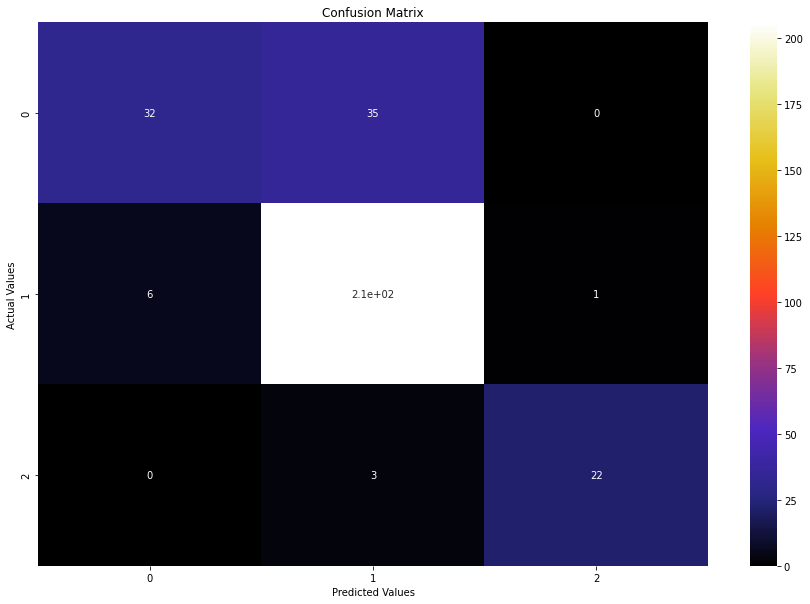

In [ ]:
cm_svm = pd.DataFrame(cm_mtx_svm_WoutP)
                    #  index=list_label,
                    #  columns=list_label)
print(cm_mtx_svm_WoutP)
plt.figure(figsize=(15,10))
sns.heatmap(cm_mtx_svm, annot=True, cmap='CMRmap')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()